<a href="https://colab.research.google.com/github/dongchanlim/Capstone_Coca_Cola/blob/main/Individual_modeling_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

>[Table of Contents](#scrollTo=8ZHYR1PYhOvg)

>>>[Import Packages](#scrollTo=6bPDSyZmoGl4)

>>[Introduction](#scrollTo=WJAjUmtVDPhy)

>>>[Background](#scrollTo=aauUjn_GmrdC)

>>>[Requirements](#scrollTo=5NkkGqwaYqQM)

>>>[Import Data](#scrollTo=f6iVCKMtoAAw)

>>>[Data feature generation & conversion](#scrollTo=wdZW3n2bPhd-)



### Import Packages

In [ ]:
# import packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Introduction


### Introduction
**This is the modeling notebook which shows analytical modeling process for business problem.**

In Swire Coca-Cola's production processes, manufacturing machines occasionally face unexpected mechanical breakdowns, leading to nearly $60 million in annual losses.

By analyzing the downtimes recorded in the Internal Warehouse Controller (IWC),

we aim to ensure the downtimes don’t cost us too much output by quantifying how much time the machine could run for before the breakdown occurs, requiring specific repairs.

This could be defined as the threshold production capacity, which defines how much output can be produced by this machine working at full capacity before needing maintenance.

### Requirements

**Modeling notebook aim to identify the main tasks with following list.**

### Import Data

In [ ]:
df = pd.read_csv('IWC_Work_Orders_Extract.csv')

### Data feature generation & conversion

In [ ]:
# Convert numeric data to date type data
df['EXECUTION_START_DATE'] = pd.to_datetime(df['EXECUTION_START_DATE'])
df['EXECUTION_FINISH_DATE'] = pd.to_datetime(df['EXECUTION_FINISH_DATE'])
df['EQUIP_START_UP_DATE'] = pd.to_datetime(df['EQUIP_START_UP_DATE'])
df['EQUIP_VALID_FROM'] = pd.to_datetime(df['EQUIP_VALID_FROM'])

In [ ]:
# Functional duration
df['FUNCTIONAL_DURATION'] =  df['EXECUTION_START_DATE'] - df['EQUIP_VALID_FROM']

In [ ]:
df.sample(50)

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,FUNCTIONAL_DURATION
118604,605162983,G221,SUZUKA,2021-02-04,2021-02-04,14:08:28.000,14:08:58.000,0.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
724589,170001124128,G261,SILVERSTONE,2020-05-26,2020-05-26,22:00:00.000,22:15:00.000,15.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
861896,203733697,G291,MONZA,2019-07-10,2019-07-11,00:17:00.000,23:55:00.000,46.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
107226,1001827836,G816,COTA,2022-11-28,2022-11-28,00:00:00.000,00:00:00.000,0.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
839824,701618357,G261,SILVERSTONE,2019-09-01,2019-09-01,06:00:00.000,06:00:00.000,30.0,G2613627,113556.0,Planned,MEAD CASE PACKER VACUUM PUMP FILTER PM,Preventive Maintenance Order,G261-PRD-L15-L03-L120,SILVERSTONE PRODUCTION,"LINES 3,4,10 - CAN LINES",LINE #3-FILLER_ROTARY_CAN,PACKER,NaN,300017233.0,NaN,NaN,NaT,NaT,NaN,NaT
686219,900156249,G261,SILVERSTONE,2017-06-02,2017-06-02,18:01:00.000,18:02:00.000,0.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
1111792,700871518,G291,MONZA,2018-10-09,2018-10-09,07:00:00.000,07:00:00.000,3.0,G291VM5044,41044.0,Planned,FILLER 100 VALVE L4 FOR LUB WHILE SHUTDO,Preventive Maintenance Order,G291-PRD-L15-L04-L080,MONZA PRODUCTION,ROTARY_CAN_LINE,LINE #4-FILLER_ROTARY_CAN,FILLER,NaN,300001510.0,L4 FILLER_ROTARY_CAN_100_VALVE,Machines,2017-02-15,2017-02-15,9999-12-31,601 days
451597,705528370,G811,MONACO,2024-03-29,2024-03-29,02:01:14.000,06:00:00.000,90.0,G811100411,169759.0,Planned,DAILY AIR COMPRESSOR MAINTENANCE,Preventive Maintenance Order,G811-PRD-P05-XXX-S040,PRODUCTION,AIR SYSTEMS,G811 AIR SYSTEMS,G811 COMPRESSOR,NaN,300131200.0,ROGERS AIR COMPRESSOR,Machines,2019-06-01,2020-03-05,9999-12-31,1485 days
401985,704103970,G812,ROMA,2022-08-19,2022-08-19,06:00:00.000,06:00:00.000,30.0,NaN,NaN,Unplanned,VACUUM CUPS FOR SUPER,Corrective Maintenance Order,G812-PRD-L15-L01-L120,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 1,PACKER,NaN,300017750.0,NaN,NaN,NaT,NaT,NaN,NaT
142436,170002051303,G261,SILVERSTONE,2023-11-14,2023-11-14,00:11:00.000,00:30:00.000,19.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT


In [ ]:
# functional location code split
df['FUCTIONAL_LOC_SPLIT'] = df['FUNCTIONAL_LOC'].str.split('-')

In [ ]:
df.isnull().sum() / len(df) * 100

,0
ORDER_ID,0.000000
PLANT_ID,0.000000
PRODUCTION_LOCATION,0.000000
EXECUTION_START_DATE,0.000000
EXECUTION_FINISH_DATE,0.000000
ACTUAL_START_TIME,0.000000
ACTUAL_FINISH_TIME,0.000000
ACTUAL_WORK_IN_MINUTES,0.000000
MAINTENANCE_PLAN,89.308635
MAINTENANCE_ITEM,89.308635


In [ ]:
df['PLANT_ID'] = df['FUCTIONAL_LOC_SPLIT'].str[0]
df['LINE_ID'] = df['FUCTIONAL_LOC_SPLIT'].str[2]
df['SUBPROCESS_ID'] = df['FUCTIONAL_LOC_SPLIT'].str[3]

df['MACHINE_ID'] = df['PLANT_ID'] + '-' + df['LINE_ID'] + '-' + df['SUBPROCESS_ID']

In [ ]:
df_ml = df.groupby('MACHINE_ID').agg(
                             PLANT_ID = pd.NamedAgg(column="FUNCTIONAL_AREA_NODE_1_MODIFIED", aggfunc="first"),
                             LINE_ID = pd.NamedAgg(column="FUNCTIONAL_AREA_NODE_3_MODIFIED", aggfunc="first"),
                             SUBPROCESS_ID = pd.NamedAgg(column="FUNCTIONAL_AREA_NODE_4_MODIFIED", aggfunc="first"),
                             FIRST_BREAKDOWN =pd.NamedAgg(column="EXECUTION_START_DATE", aggfunc="min"),
                             SECOND_LAST_BREAKDOWN =pd.NamedAgg(column="EXECUTION_START_DATE", aggfunc= lambda x: x.sort_values().iloc[-2] if len(x) >= 2 else pd.NaT),
                             LAST_BREAKDOWN =pd.NamedAgg(column="EXECUTION_START_DATE", aggfunc="max"),
                             FIRST_BREAK_DURATION = pd.NamedAgg(column="FUNCTIONAL_DURATION", aggfunc="max"),
                             TOTAL_WORKING_MINUTES = pd.NamedAgg(column="ACTUAL_WORK_IN_MINUTES", aggfunc="sum"),
                             BREAKDOWN_COUNT =pd.NamedAgg(column="ORDER_ID", aggfunc="count"),
                             PLANNED_COUNT = pd.NamedAgg(column="MAINTENANCE_PLAN", aggfunc = "count")).reset_index()

In [ ]:
df_ml = df_ml.assign(UNPLANNED_COUNT = df_ml['BREAKDOWN_COUNT'] - df_ml['PLANNED_COUNT'],
                     TOTAL_RUNNUNG_DURATION = df_ml['SECOND_LAST_BREAKDOWN'] - df_ml['FIRST_BREAKDOWN'],
                     TARGET = df_ml['LAST_BREAKDOWN'] - df_ml['SECOND_LAST_BREAKDOWN'])

In [ ]:
df_ml.sample(30)

,MACHINE_ID,PLANT_ID,LINE_ID,SUBPROCESS_ID,FIRST_BREAKDOWN,SECOND_LAST_BREAKDOWN,LAST_BREAKDOWN,FIRST_BREAK_DURATION,TOTAL_WORKING_MINUTES,BREAKDOWN_COUNT,PLANNED_COUNT,UNPLANNED_COUNT,TOTAL_RUNNUNG_DURATION,TARGET
17,G261-A55-I06,SILVERSTONE PRODUCTION,HVAC INT,None,2021-06-24,2023-11-10,2023-11-10,NaT,274.8,5,4,1,869 days,0 days
117,G811-P91-W03,PRODUCTION,G811 CHEM FEED SYSTEM,None,2023-02-10,2024-06-21,2024-06-21,932 days,2535.0,26,9,17,497 days,0 days
3,G221-L30-L01,SUZUKA PRODUCTION,LINE #1 - FILLER_ROT_BTL_PET,CODER,2017-05-02,2024-08-15,2024-08-19,NaT,400644.6,5278,2936,2342,2662 days,4 days
83,G811-A55-I06,PRODUCTION,G811 HVAC INT,HVAC/SWAMP COOLERS,2023-05-01,2024-08-07,2024-08-09,NaT,24991.2,52,3,49,464 days,2 days
130,G812-L30-L02,PRODUCTION,G812 PRD FILLER_ROT_BTL_PET LINE 2,LABELER,2017-08-25,2024-08-29,2024-08-29,1642 days,763622.4,11200,7626,3574,2561 days,0 days
137,G812-P70-R02,PRODUCTION,G812 COMPRESSOR SYSTEMS REFRIG,None,2017-08-30,2024-07-30,2024-08-26,NaT,18349.8,122,8,114,2526 days,27 days
112,G811-P80-S03,PRODUCTION,G811 SYRUP STORAGE,TANK,2018-04-30,2024-08-02,2024-08-05,NaT,19545.0,112,0,112,2286 days,3 days
126,G812-F10-002,FLEET,WAREHOUSE,None,2020-05-16,2022-08-19,2023-05-19,NaT,13320.0,121,0,121,825 days,273 days
151,G816-L15-L03,COTA PRODUCTION,LINE #3-CAN_LINE,CODER,2017-10-30,2024-08-29,2024-08-29,2495 days,1499238.6,16364,4528,11836,2495 days,0 days
139,G812-P75-XXX,PRODUCTION,G812 SANITATION,None,2022-03-28,2023-02-28,2023-06-01,NaT,330.0,3,0,3,337 days,93 days


array([[<Axes: title={'center': 'FIRST_BREAKDOWN'}>,
        <Axes: title={'center': 'SECOND_LAST_BREAKDOWN'}>,
        <Axes: title={'center': 'LAST_BREAKDOWN'}>],
       [<Axes: title={'center': 'TOTAL_WORKING_MINUTES'}>,
        <Axes: title={'center': 'BREAKDOWN_COUNT'}>,
        <Axes: title={'center': 'PLANNED_COUNT'}>],
       [<Axes: title={'center': 'UNPLANNED_COUNT'}>, <Axes: >, <Axes: >]],
      dtype=object)

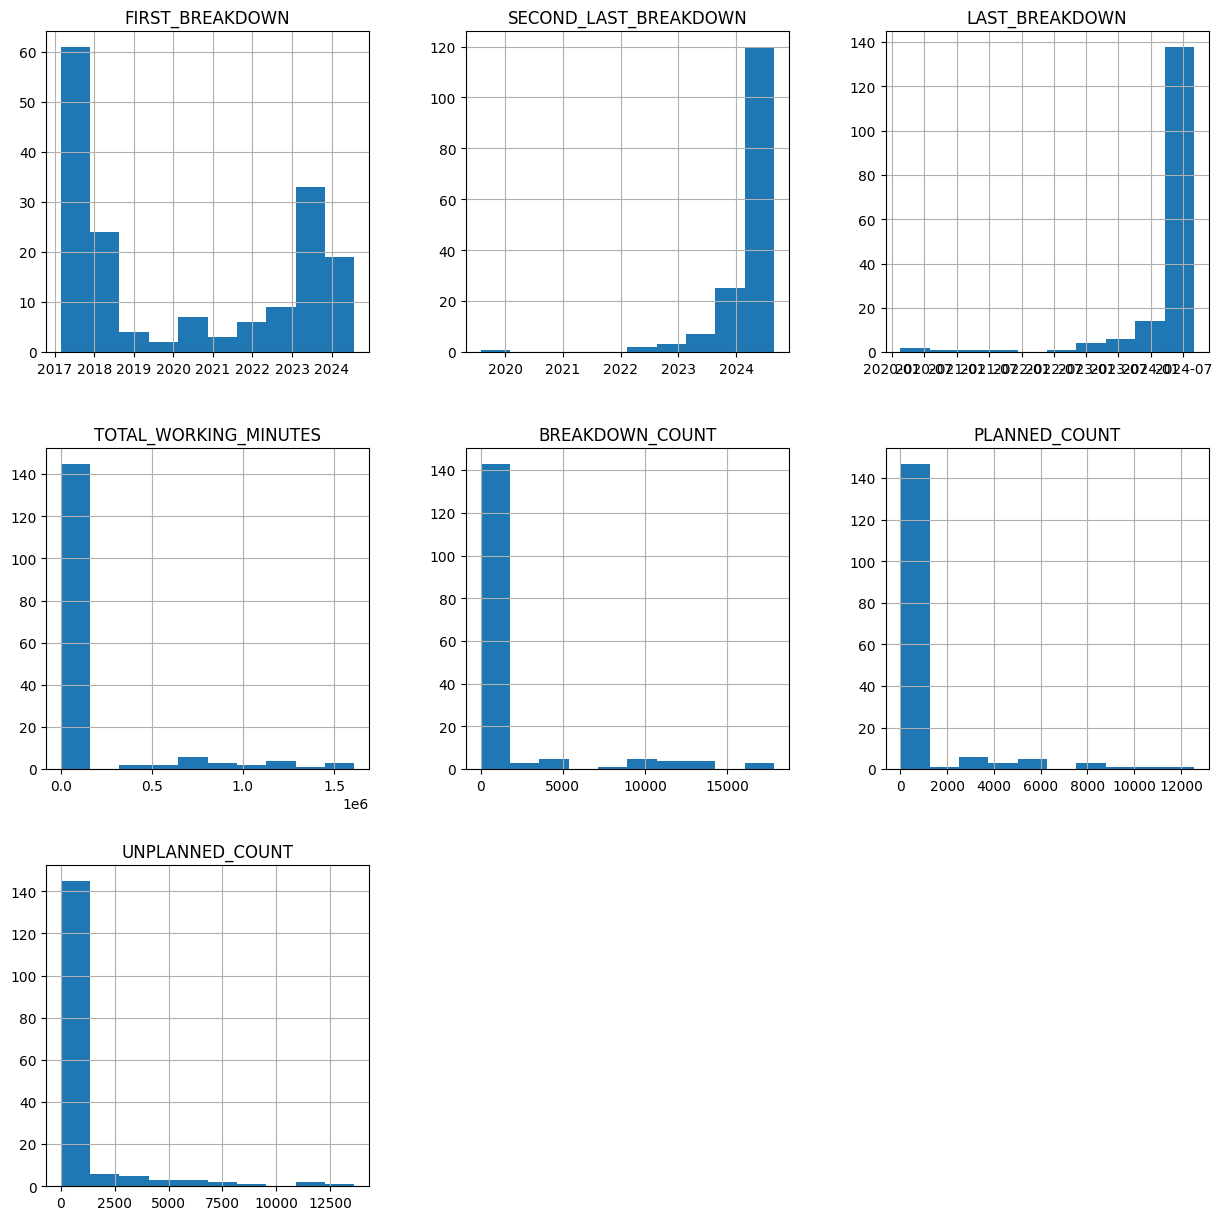

In [ ]:
df_ml.hist(figsize=(15,15))

In [ ]:
df_ml['TARGET'].describe()

,TARGET
count,158
mean,53 days 17:18:59.240506329
std,129 days 00:54:33.160978956
min,0 days 00:00:00
25%,0 days 00:00:00
50%,7 days 12:00:00
75%,47 days 18:00:00
max,1252 days 00:00:00


In [ ]:
df_ml.isnull().sum() / len(df_ml) * 100

,0
MACHINE_ID,0.000000
PLANT_ID,2.976190
LINE_ID,4.166667
SUBPROCESS_ID,58.333333
FIRST_BREAKDOWN,0.000000
SECOND_LAST_BREAKDOWN,5.952381
LAST_BREAKDOWN,0.000000
FIRST_BREAK_DURATION,54.166667
TOTAL_WORKING_MINUTES,0.000000
BREAKDOWN_COUNT,0.000000


In [ ]:
df_ml_model = df_ml.dropna(subset=['TARGET'])

In [ ]:
y = df_ml_model['TARGET'].dt.days.astype(int)
X = pd.get_dummies(df_ml_model.drop(columns=['TARGET','MACHINE_ID','LAST_BREAKDOWN','FIRST_BREAK_DURATION', 'BREAKDOWN_COUNT']))


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.describe()

,TARGET
count,158.000000
mean,53.721519
std,129.037884
min,0.000000
25%,0.000000
50%,7.500000
75%,47.750000
max,1252.000000


<Axes: >

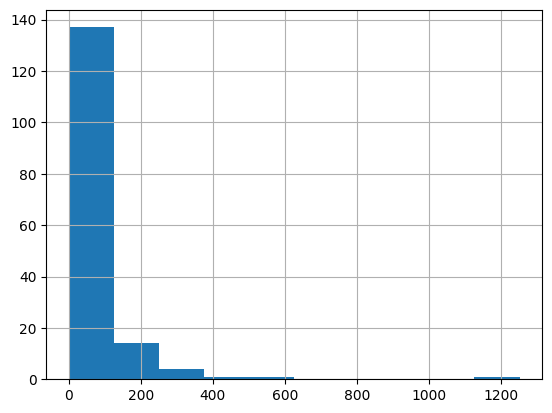

In [ ]:
y.hist()

In [ ]:
for col in X_train.select_dtypes(include=['datetime64','timedelta64']).columns:
  # Extract total seconds for timedelta columns
  if pd.api.types.is_timedelta64_dtype(X_train[col]) and X_train[col].isnull().any() == False:
    X_train[col] = X_train[col].dt.total_seconds().astype(int) / (3600 * 24)
    X_test[col] = X_test[col].dt.total_seconds().astype(int) / (3600 * 24)
  # Extract day of the month for datetime columns
  elif pd.api.types.is_datetime64_dtype(X_train[col]) and X_train[col].isnull().any() == False:
    X_train[col] = pd.to_numeric(X_train[col])
    X_test[col] = pd.to_numeric(X_test[col])

In [ ]:
X_train.sample(30)

,FIRST_BREAKDOWN,SECOND_LAST_BREAKDOWN,TOTAL_WORKING_MINUTES,PLANNED_COUNT,UNPLANNED_COUNT,TOTAL_RUNNUNG_DURATION,PLANT_ID_COOLER SERVICE,PLANT_ID_COTA PRODUCTION,PLANT_ID_FLEET,PLANT_ID_MONZA PRODUCTION,PLANT_ID_PRODUCTION,PLANT_ID_SILVERSTONE PRODUCTION,PLANT_ID_SUZUKA PRODUCTION,LINE_ID_ACTIVATED_CARBON,LINE_ID_AIR SYSTEMS,LINE_ID_BOILER ROOM,LINE_ID_CHEMICAL_FEED_SYSTEM,LINE_ID_CHILLING SYSTEMS REFRIG,LINE_ID_CIP SYSTEMS,LINE_ID_CODERS,LINE_ID_COMPRESSOR SYSTEMS REFRIG,LINE_ID_COMPRESSOR_SYSTEMS_REFRIG,LINE_ID_CONDENSING SYSTEMS REFRIG,LINE_ID_CONDENSING_SYSTEMS_REFRIG,LINE_ID_COOLER SERVICE HVAC EXT,LINE_ID_ELECTRICAL SYSTEMS,LINE_ID_ENVIRONMENTAL EXT,LINE_ID_ENVIRONMENTAL INT,LINE_ID_EYE WASH,LINE_ID_FILTRATION,LINE_ID_FILTRATION / CARBON,LINE_ID_FIRE EXTINGUISHERS,LINE_ID_G811 AIR SYSTEMS,LINE_ID_G811 CHEM FEED SYSTEM,LINE_ID_G811 CIP SYSTEMS,LINE_ID_G811 CO2,LINE_ID_G811 ELECTRICAL CONTROLS,LINE_ID_G811 ELECTRICAL EXT,LINE_ID_G811 ELECTRICAL INT,LINE_ID_G811 ENVIRONMENTAL EXT,LINE_ID_G811 ENVIRONMENTAL/CONTRUCTION INT,LINE_ID_G811 EYE WASH,LINE_ID_G811 FILTRATION / CARBON,LINE_ID_G811 HVAC EXT,LINE_ID_G811 HVAC INT,LINE_ID_G811 INSPECTION INT,LINE_ID_G811 INSTRUMENTATION,LINE_ID_G811 LIGHTING EXT,LINE_ID_G811 LIGHTING INT,LINE_ID_G811 LUBE SYSTEMS,LINE_ID_G811 MAIN LUNCH ROOM INT,LINE_ID_G811 MANLIFTS,LINE_ID_G811 MEETINGS/DDS/ADMIN INT,LINE_ID_G811 NATURAL GAS SYSTEM EXT,LINE_ID_G811 PAINTING INT,LINE_ID_G811 PLUMBING EXT,LINE_ID_G811 PLUMBING INT,LINE_ID_G811 RECYCLING,LINE_ID_G811 REFRIGERATION,LINE_ID_G811 RESPIRATORS,LINE_ID_G811 SAFETY EXT,LINE_ID_G811 SAFETY INT,LINE_ID_G811 SECURITY EXT,LINE_ID_G811 SECURITY INT,LINE_ID_G811 SPRINKLERS,LINE_ID_G811 STEAM SYSTEMS,LINE_ID_G811 STORAGE TANKS,LINE_ID_G811 SYRUP BATCHING SYSTEMS,LINE_ID_G811 SYRUP STORAGE,LINE_ID_G811 ULTRAVIOLET SYSTEM,LINE_ID_G811 WATER TREATMENT,LINE_ID_G811 WATER TREATMENT PUMPS,LINE_ID_G812 AIR SYSTEMS,LINE_ID_G812 CHILLING SYSTEMS REFRIG,LINE_ID_G812 CIP SYSTEM,LINE_ID_G812 CO2,LINE_ID_G812 COMPRESSOR SYSTEMS REFRIG,LINE_ID_G812 CONDENSING SYSTEMS REFRIG,LINE_ID_G812 EYE WASH,LINE_ID_G812 HVAC EXT,LINE_ID_G812 PRD FILLER_ROTARY_CAN LINE 1,LINE_ID_G812 PRD FILLER_ROTARY_CAN LINE 3,LINE_ID_G812 PRD FILLER_ROT_BTL_PET LINE 2,LINE_ID_G812 QUALITY ASSURANCE EQUIPMENT,LINE_ID_G812 RECYCLING,LINE_ID_G812 SANITATION,LINE_ID_G812 SPRINKLERS,LINE_ID_G812 STEAM SYSTEMS,LINE_ID_G812 SYRUP BATCHING,LINE_ID_G812 SYRUP STORAGE,LINE_ID_G812 SYRUP/BLENDING ROOM,LINE_ID_G812 WASTE WATER TREATMENT,LINE_ID_G812 WATER TREATMENT,LINE_ID_HEATING SYSTEMS,LINE_ID_HVAC EXT,LINE_ID_HVAC INT,LINE_ID_LIGHTING INT,LINE_ID_LINE #1 - FILLER_ROT_BTL_PET,LINE_ID_LINE #1 - ROT_BTL_PET,LINE_ID_LINE #1-CAN_LINE,LINE_ID_LINE #10-FILLER_ROTARY_CAN,LINE_ID_LINE #2 - BOTTLE_LINE_PET,LINE_ID_LINE #2 - FILLER_ROT_BTL_PET,LINE_ID_LINE #2 - ROT_BTL_PET,LINE_ID_LINE #3 - FILLER_ROT_BTL_PET,LINE_ID_LINE #3-CAN_LINE,LINE_ID_LINE #3-FILLER_ROTARY_CAN,LINE_ID_LINE #4 - BOTTLE_LINE_PET,LINE_ID_LINE #4-FILLER_ROTARY_CAN,LINE_ID_LINE #6-FILLER_ROTARY_BTL_PET,LINE_ID_LINE #8 - FILLER_BIB,LINE_ID_LINE #9 - ROT_BTL_PET,LINE_ID_LINE 1 CAN,LINE_ID_LINE 10,LINE_ID_LINE 2 LARGET PET,LINE_ID_LINE 3 SMALL PET,LINE_ID_MOBILE EQUIPMENT,LINE_ID_NITROGEN SYSTEMS,LINE_ID_PUMPS,LINE_ID_QUALITY ASSURANCE EQUIPMENT,LINE_ID_RECYCLING,LINE_ID_RECYCLING SYSTEM,LINE_ID_SECURITY EXT,LINE_ID_SPRINKLERS,LINE_ID_STORAGE TANKS,LINE_ID_SUGAR/HFC COMPONENTS,LINE_ID_SYRUP AND BLENDING ROOM,LINE_ID_SYRUP BATCHING,LINE_ID_SYRUP BULK INGREDIANTS,LINE_ID_SYRUP/BATCHING/BLENDING ROOM,LINE_ID_SYRUP/BLENDING ROOM,LINE_ID_SYRUP_STORAGE,LINE_ID_SYRYUP BULK INGREDIENTS,LINE_ID_TANK SYSTEMS,LINE_ID_TANKS,LINE_ID_TOWERS,LINE_ID_ULTRAVIOLET SYSTEM,LINE_ID_WAREHOUSE,LINE_ID_WASTE WATER TREATMENT,LINE_ID_WATER SYSTEMS,LINE_ID_WATER TREATMENT,SUBPROCESS_ID_BATCH STATION #2,SUBPROCESS_ID_BOILER,SUBPROCESS_ID_CAPPER,SUBPROCESS_ID_CIP #2 SYSTEM,SUBPROCESS_ID_CIP SYSTEM,SUBPROCESS_ID_CODER,SUBPROCESS_ID_CONVEYOR,SUBPROCESS_ID_DRYER,SUBPROCESS_

In [ ]:
# Initialize and train the models
models = {
    "OLS": LinearRegression(),
    "Ridge": Ridge(alpha=0.5),
    "Lasso": Lasso(alpha=0.5),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5)  # Tune alpha and l1_ratio
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_trian = math.sqrt(mse_train)
    rmse_test = math.sqrt(mse_test)

    results[model_name] = {"train MSE": mse_train, "test MSE": mse_test,
                           "train R-squared": r2_train, "test R-squared": r2_test,
                           "train RMSE": rmse_trian, "test RMSE": rmse_test}

# Print the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  train MSE: {metrics['train MSE']:.4f}")
    print(f"  test MSE: {metrics['test MSE']:.4f}")
    print(f"  train RMSE: {metrics['train RMSE']:.4f}")
    print(f"  test RMSE: {metrics['test RMSE']:.4f}")
    print(f"  train R-squared: {metrics['train R-squared']:.4f}")
    print(f"  test R-squared: {metrics['test R-squared']:.4f}")

OLS:
  train MSE: 3946.4932
  test MSE: 6998.6032
  train RMSE: 62.8211
  test RMSE: 83.6577
  train R-squared: 0.7536
  test R-squared: 0.6086
Ridge:
  train MSE: 3973.3493
  test MSE: 6918.0614
  train RMSE: 63.0345
  test RMSE: 83.1749
  train R-squared: 0.7520
  test R-squared: 0.6131
Lasso:
  train MSE: 1032.0511
  test MSE: 7464.0931
  train RMSE: 32.1256
  test RMSE: 86.3950
  train R-squared: 0.9356
  test R-squared: 0.5826
ElasticNet:
  train MSE: 3785.0880
  test MSE: 6767.9204
  train RMSE: 61.5231
  test RMSE: 82.2674
  train R-squared: 0.7637
  test R-squared: 0.6215


In [ ]:
results

{'OLS': {'train MSE': 3946.4932069929546,
  'test MSE': 6998.603180316421,
  'train R-squared': 0.753638072618545,
  'test R-squared': 0.60858948048813,
  'train RMSE': 62.821120707871444,
  'test RMSE': 83.65765464269495},
 'Ridge': {'train MSE': 3973.3493096775173,
  'test MSE': 6918.061442255527,
  'train R-squared': 0.7519615661931445,
  'test R-squared': 0.6130939341233164,
  'train RMSE': 63.034508879482175,
  'test RMSE': 83.17488468435364},
 'Lasso': {'train MSE': 1032.051060417203,
  'test MSE': 7464.093134024535,
  'train R-squared': 0.9355736662741682,
  'test R-squared': 0.5825560478281844,
  'train RMSE': 32.12555151926894,
  'test RMSE': 86.39498326884805},
 'ElasticNet': {'train MSE': 3785.0880316644707,
  'test MSE': 6767.92041420651,
  'train R-squared': 0.7637138761224779,
  'test R-squared': 0.6214908636640559,
  'train RMSE': 61.52306910147177,
  'test RMSE': 82.26737150417844}}

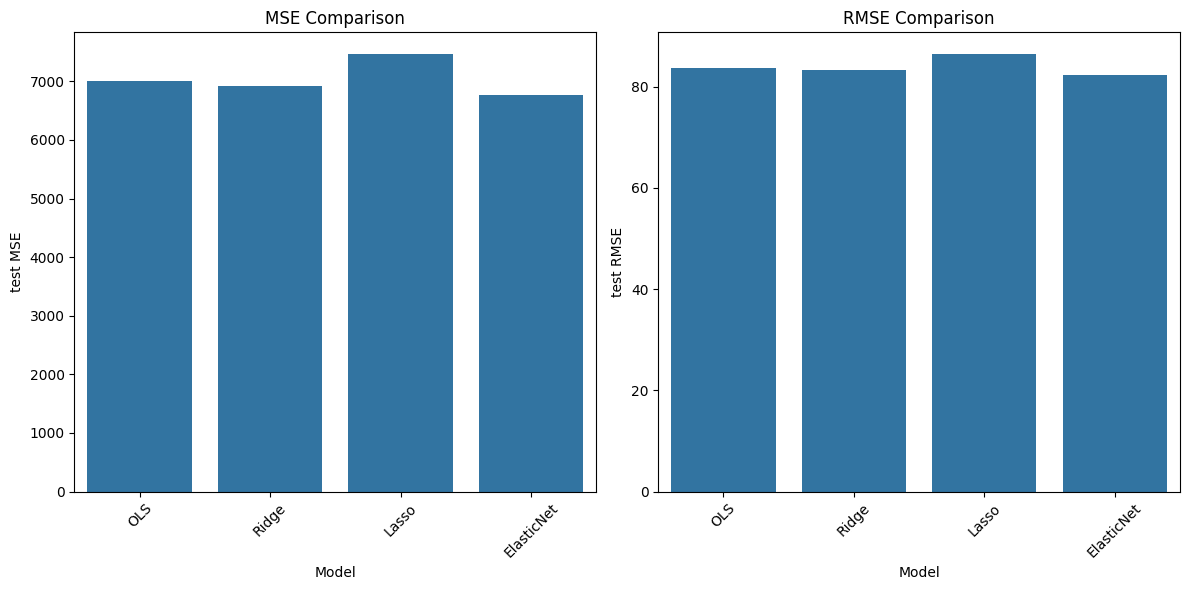

OLS:
  RMSE: 83.6577
  MSE: 6998.6032
  R-squared: 0.6086
Ridge:
  RMSE: 83.1749
  MSE: 6918.0614
  R-squared: 0.6131
Lasso:
  RMSE: 86.3950
  MSE: 7464.0931
  R-squared: 0.5826
ElasticNet:
  RMSE: 82.2674
  MSE: 6767.9204
  R-squared: 0.6215


In [ ]:
# Create dataframes for visualization
mse_df = pd.DataFrame(results).T.reset_index()
mse_df = mse_df.rename(columns={'index': 'Model'})


plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='test MSE', data=mse_df)
plt.title('MSE Comparison')
plt.xticks(rotation=45)

# Plot RMSE
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='test RMSE', data=mse_df)
plt.title('RMSE Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print RMSE values
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  RMSE: {metrics['test RMSE']:.4f}")
    print(f"  MSE: {metrics['test MSE']:.4f}")
    print(f"  R-squared: {metrics['test R-squared']:.4f}")

In [ ]:
# prompt: CREATE THE SUMMARY TABLE FOR OLS, LASSO, RIDGE, AND ELASTICNET REGRESSION MODELS IN RESULTS

results_df = pd.DataFrame(results).T.reset_index()
results_df = results_df.rename(columns={'index': 'Model'})
results_df

,Model,train MSE,test MSE,train R-squared,test R-squared,train RMSE,test RMSE
0,OLS,3946.493207,6998.603180,0.753638,0.608589,62.821121,83.657655
1,Ridge,3973.349310,6918.061442,0.751962,0.613094,63.034509,83.174885
2,Lasso,1032.051060,7464.093134,0.935574,0.582556,32.125552,86.394983
3,ElasticNet,3785.088032,6767.920414,0.763714,0.621491,61.523069,82.267372


## OLS linear Model Summary table

In [ ]:
# prompt: get each model's variable, intercept, coefficient, t-score, and p-value in model results

import statsmodels.api as sm


# Add a constant column to X_train for the intercept
X_train_with_constant = X_train.astype(float)
# Fit the model using statsmodels
model_statsmodels = sm.OLS(y_train, X_train_with_constant).fit()
model_statsmodels.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.075
Date:                Wed, 30 Oct 2024   Prob (F-statistic):              0.130
Time:                        00:24:40   Log-Likelihood:                -786.63
No. Observations:                 126   AIC:                             1579.
Df Residuals:                     123   BIC:                             1588.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
FIRST_BREAKDOWN                               2.042e-16   1.39e-16      1.465      0.146   -7.17e-17     4.8e-16
SECOND_LAST_BREAKDOWN                        -1.587e-16    1.3e-16     -1.219      0.225   -4.17e-16    9.91e-17
TOTAL_WORKING_MINUTES                        -3.074e-05    3.3e-05     -0.932      0.353    -9.6e-05    3.45e-05
PLANNED_COUNT                                 -1.35e-07   1.45e-07     -0.932      0.353   -4.22e-07    1.52e-07
UNPLANNED_COUNT                              -1.914e-07   2.05e-07     -0.932      0.353   -5.98e-07    2.15e-07
TOTAL_RUNNUNG_DURATION                       -3.085e-23   3.31e-23     -0.932      0.353   -9.64e-23    3.47e-23
PLANT_ID_COOLER SERVICE                       4.827e-13   5.18e-13      0.932      0.353   -5.43e-13    1.51e-12
PLANT_ID_COTA PRODUCTION                     -3.592e-12   3.85e-12     -0.932      0.353   -1.12e-11    4.04e-12
PLANT_ID_FLEET                                9.219e-14   9.89e-14      0.932      0.353   -1.04e-13    2.88e-13
PLANT_ID_MONZA PRODUCTION                     9.598e-13   1.03e-12      0.932      0.353   -1.08e-12       3e-12
PLANT_ID_PRODUCTION                           5.355e-12   5.75e-12      0.932      0.353   -6.02e-12    1.67e-11
PLANT_ID_SILVERSTONE PRODUCTION              -4.848e-12    5.2e-12     -0.932      0.353   -1.51e-11    5.45e-12
PLANT_ID_SUZUKA PRODUCTION                    3.687e-13   3.96e-13      0.932      0.353   -4.14e-13    1.15e-12
LINE_ID_ACTIVATED_CARBON                      6.678e-13   7.17e-13      0.932      0.353   -7.51e-13    2.09e-12
LINE_ID_AIR SYSTEMS                                   0          0        nan        nan           0           0
LINE_ID_BOILER ROOM                          -1.071e-13   1.15e-13     -0.932      0.353   -3.35e-13     1.2e-13
LINE_ID_CHEMICAL_FEED_SYSTEM                          0          0        nan        nan           0           0
LINE_ID_CHILLING SYSTEMS REFRIG                6.19e-13   6.64e-13      0.932      0.353   -6.96e-13    1.93e-12
LINE_ID_CIP SYSTEMS                          -6.423e-15   6.89e-15     -0.932      0.353   -2.01e-14    7.22e-15
LINE_ID_CODERS                                        0          0        nan        nan           0           0
LINE_ID_COMPRESSOR SYSTEMS REFRIG             6.628e-13   7.11e-13      0.932      0.353   -7.45e-13    2.07e-12
LINE_ID_COMPRESSOR_SYSTEMS_REFRIG             6.602e-13   7.08e-13      0.932      0.353   -7.42e-13    2.06e-12
LINE_ID_CONDENSING SYSTEMS REFRIG             1.297e-12   1.39e-12      0.932      0.353   -1.46e-12    4.05e-12
LINE_ID_CONDENSING_SYSTEMS_REFRIG             6.517e-13   6.99e-13      0.932      0.353   -7.33e-13    2.04e-12
LINE_ID_COOLER SERVICE HVAC EXT 

### Time-Series Model (ARIMA)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'y' and 'X' are defined as in the previous code

# Prepare time series data (using 'y' as the target variable)
y_series = df_ml.dropna(subset = 'TARGET').set_index('FIRST_BREAKDOWN')['TARGET'].dt.days.astype(int).sort_index().reset_index(drop=True)
y_series


,TARGET
0,0
1,0
2,1
3,1
4,0
...,...
153,58
154,165
155,39
156,0


In [ ]:
# Split data into training and testing sets (adjust the split point as needed)
train_y = y_series[:int(0.8 * len(y_series))]
test_y = y_series[int(0.8 * len(y_series)):]

# Fit an ARIMA model (you might need to tune the (p, d, q) order)
model = ARIMA(train_y, order=(1,2,3))
model_fit = model.fit()

In [ ]:
# Make predictions
prediction_index = range(len(train_y), len(train_y) + len(test_y))  # Create a range of indices for predictions
predictions = model_fit.predict(start=prediction_index[0], end=prediction_index[-1], dynamic=False)

predictions

,predicted_mean
126,35.429674
127,41.190715
128,35.765404
129,41.481901
130,36.100956
131,41.773264
132,36.436333
133,42.064803
134,36.771534
135,42.356515


Test RMSE: 72.76527433365422


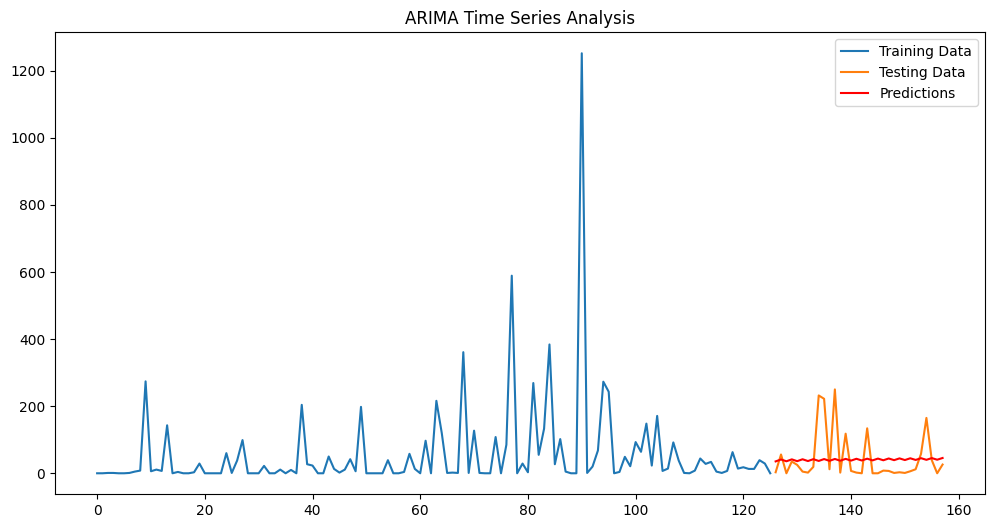

In [ ]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE:', rmse)

# Plot the results (optional)
plt.figure(figsize=(12,6))
plt.plot(train_y, label='Training Data')
plt.plot(test_y, label='Testing Data')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Time Series Analysis')
plt.show()